# Метод главных компонент (Principal Component Analysis) - Проверочные задания

-----
-----

## Цель: выяснить с помощью метода главных компонент, какие написанные от руки цифры наиболее сильно отличаются друг от друга.

-----
-----

# Данные


Источник данных: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
digits = pd.read_csv('../DATA/digits.csv')

In [6]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


**Создадим новый датафрейм, назовём его *pixels*, в котором будут только значения для пикселей. Для этого удалим колонку number_label.**

In [8]:
pixels = digits.drop('number_label', axis=1)

In [10]:
pixels.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Выводим изображение на экран

**Возьмём только один ряд пикселей - для этого возьмём первую строку в датафрейме pixels.**

In [12]:
row_pix = pixels.iloc[0]

In [14]:
row_pix

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

**Преобразуем полученный ранее объект Series (первая строка датафрейма) в массив numpy.**

In [16]:
pix_arr = np.array(row_pix)

In [18]:
pix_arr

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**Поменяем форму этого массива numpy в размерность (8,8) с помощью reshape.**

In [20]:
pix_arr = pix_arr.reshape(8, 8)

In [22]:
pix_arr.shape

(8, 8)

In [24]:
pix_arr

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**С помощью Seaborn выведем этот массив на экран - должно получиться изображение цифры, написанной от руки. Параметры cmap могут менять цвета, но не могут менять значения пикселей.**

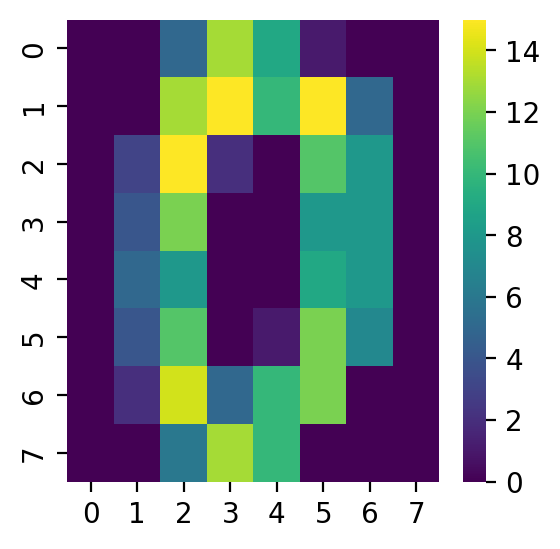

In [26]:
plt.figure(figsize=(3, 3), dpi=200)
sns.heatmap(data=pix_arr, cmap='viridis')
plt.show()

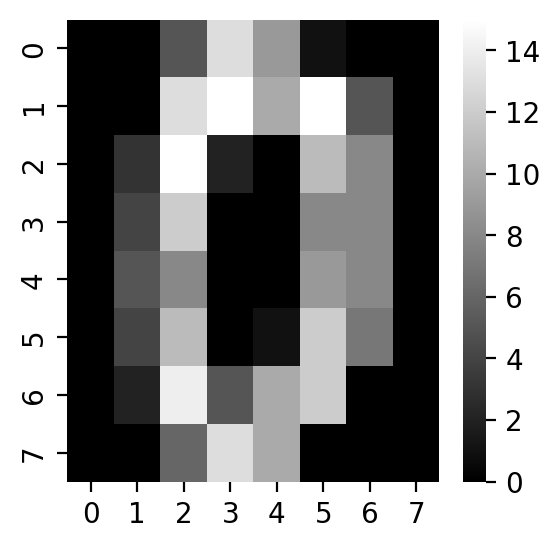

In [28]:
plt.figure(figsize=(3, 3), dpi=200)
sns.heatmap(data=pix_arr, cmap='gray')
plt.show()

------

Далее мы перейдём к методу главных компонент.

## Масштабирование данных

**С помощью Scikit-Learn выполним масштабирование датафрейма с пикселями.**

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [36]:
scaled_X = scaler.fit_transform(pixels)

In [38]:
scaled_X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## Метод главных компонент (PCA - Principal Component Analysis)

**Применим метод главных компонент к промасштабированному набору пикселей, выделяя 2 главные компоненты.**

In [40]:
from sklearn.decomposition import PCA

In [42]:
pca_model = PCA(n_components=2)

In [44]:
pc_result = pca_model.fit_transform(scaled_X)

**Выясним, сколько вариативности объясняется этими 2 главными компонентами.**

In [46]:
pca_model.components_

array([[-0.        ,  0.18223392,  0.285868  ,  0.22036967, -0.02516956,
        -0.00949725, -0.0524765 , -0.06269499,  0.03470727,  0.24553368,
         0.22915174, -0.10794381,  0.03620209,  0.03871159, -0.08378077,
        -0.09277502,  0.01669934,  0.1367165 , -0.06305075, -0.12287927,
         0.14819348, -0.02348425, -0.1711997 , -0.10420837, -0.00394882,
        -0.1163897 , -0.18820473,  0.0658604 ,  0.14353257, -0.12820705,
        -0.18062075, -0.05270917, -0.        , -0.23890251, -0.23500613,
        -0.00509137, -0.01310881, -0.15911618, -0.12939416, -0.        ,
        -0.05559906, -0.18715707, -0.15353371, -0.04682572, -0.11089272,
        -0.10720947,  0.01792652, -0.00227271, -0.02881729,  0.040868  ,
         0.11027068,  0.0318244 , -0.07904945,  0.06832147,  0.12124707,
         0.04877119, -0.00183586,  0.16039569,  0.27985301,  0.19444929,
         0.01777381,  0.103198  ,  0.1198106 ,  0.07149362],
       [ 0.        ,  0.04702701,  0.0595648 , -0.02080385,  0.

In [50]:
df_components = pd.DataFrame(pca_model.components_, index=['PC1', 'PC2'], columns=pixels.columns)

In [52]:
df_components

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
PC1,-0.0,0.182234,0.285868,0.220370,-0.025170,-0.009497,-0.052476,-0.062695,0.034707,0.245534,...,0.121247,0.048771,-0.001836,0.160396,0.279853,0.194449,0.017774,0.103198,0.119811,0.071494
PC2,0.0,0.047027,0.059565,-0.020804,0.155903,0.274133,0.249733,0.145832,-0.001027,0.027619,...,-0.257752,-0.115002,0.004883,0.044498,0.081400,-0.009905,-0.251934,-0.242618,-0.165089,-0.071329


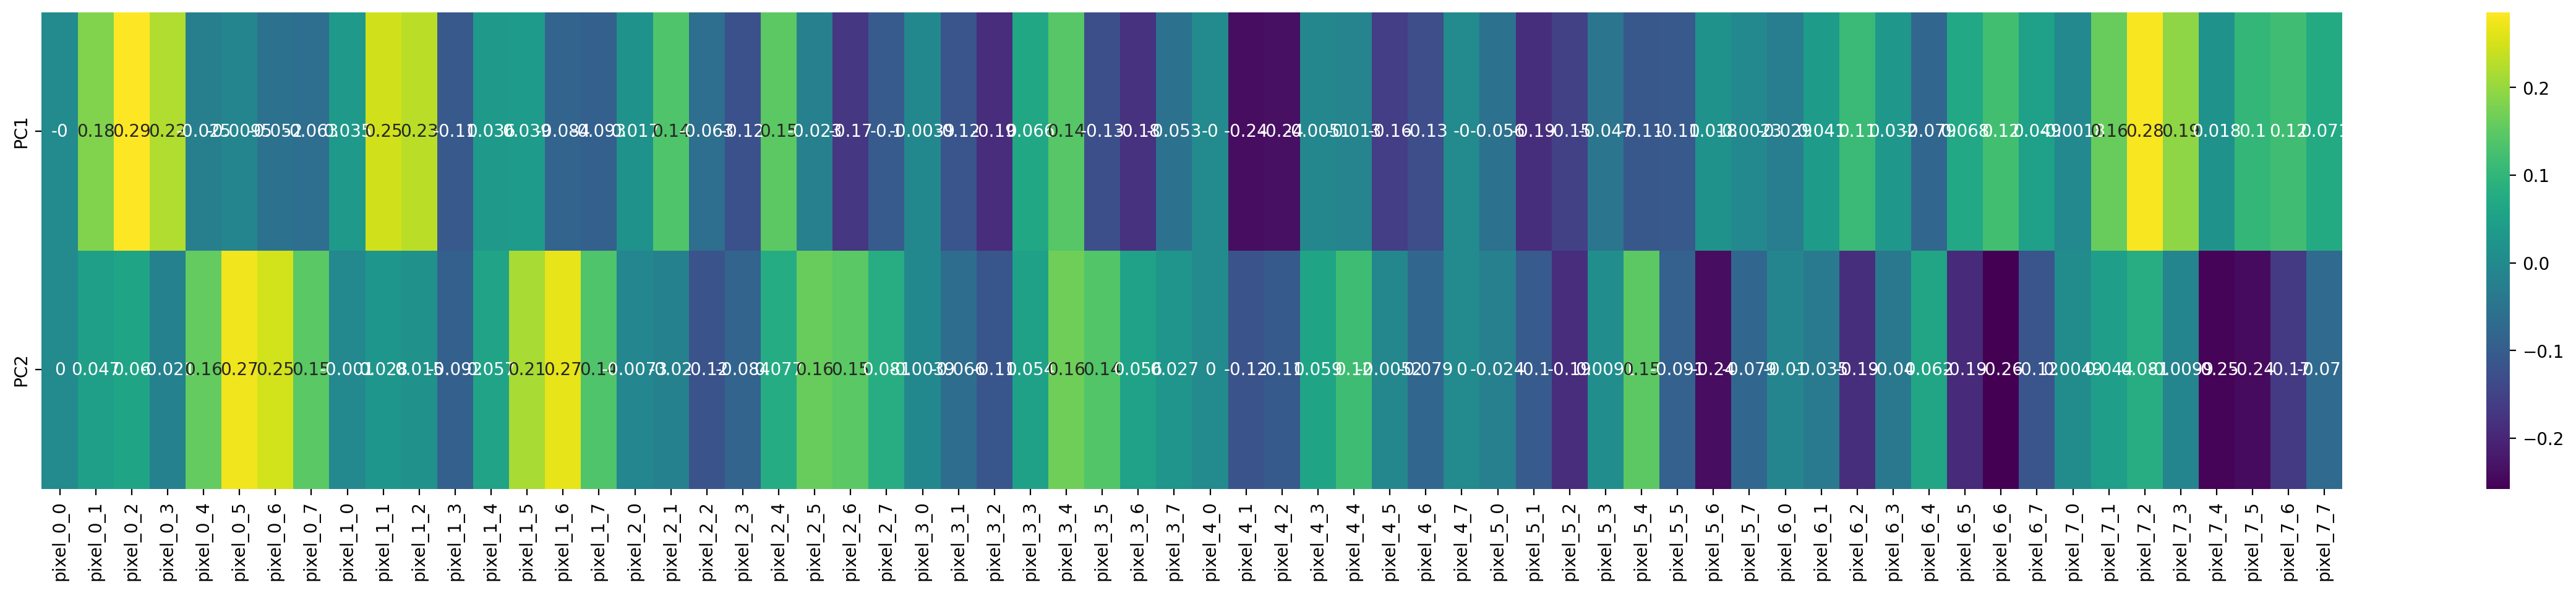

In [54]:
plt.figure(figsize=(30, 5), dpi=200)
sns.heatmap(df_components, annot=True, cmap='viridis')
plt.show()

In [56]:
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [58]:
np.sum(pca_model.explained_variance_ratio_)

np.float64(0.2159497050083282)

**Построим график scatterplot для цифр в 2-мерном пространстве главных компонент, раскрашивая график разными цветами на основе колонки number_label в исходном датафрейме.**

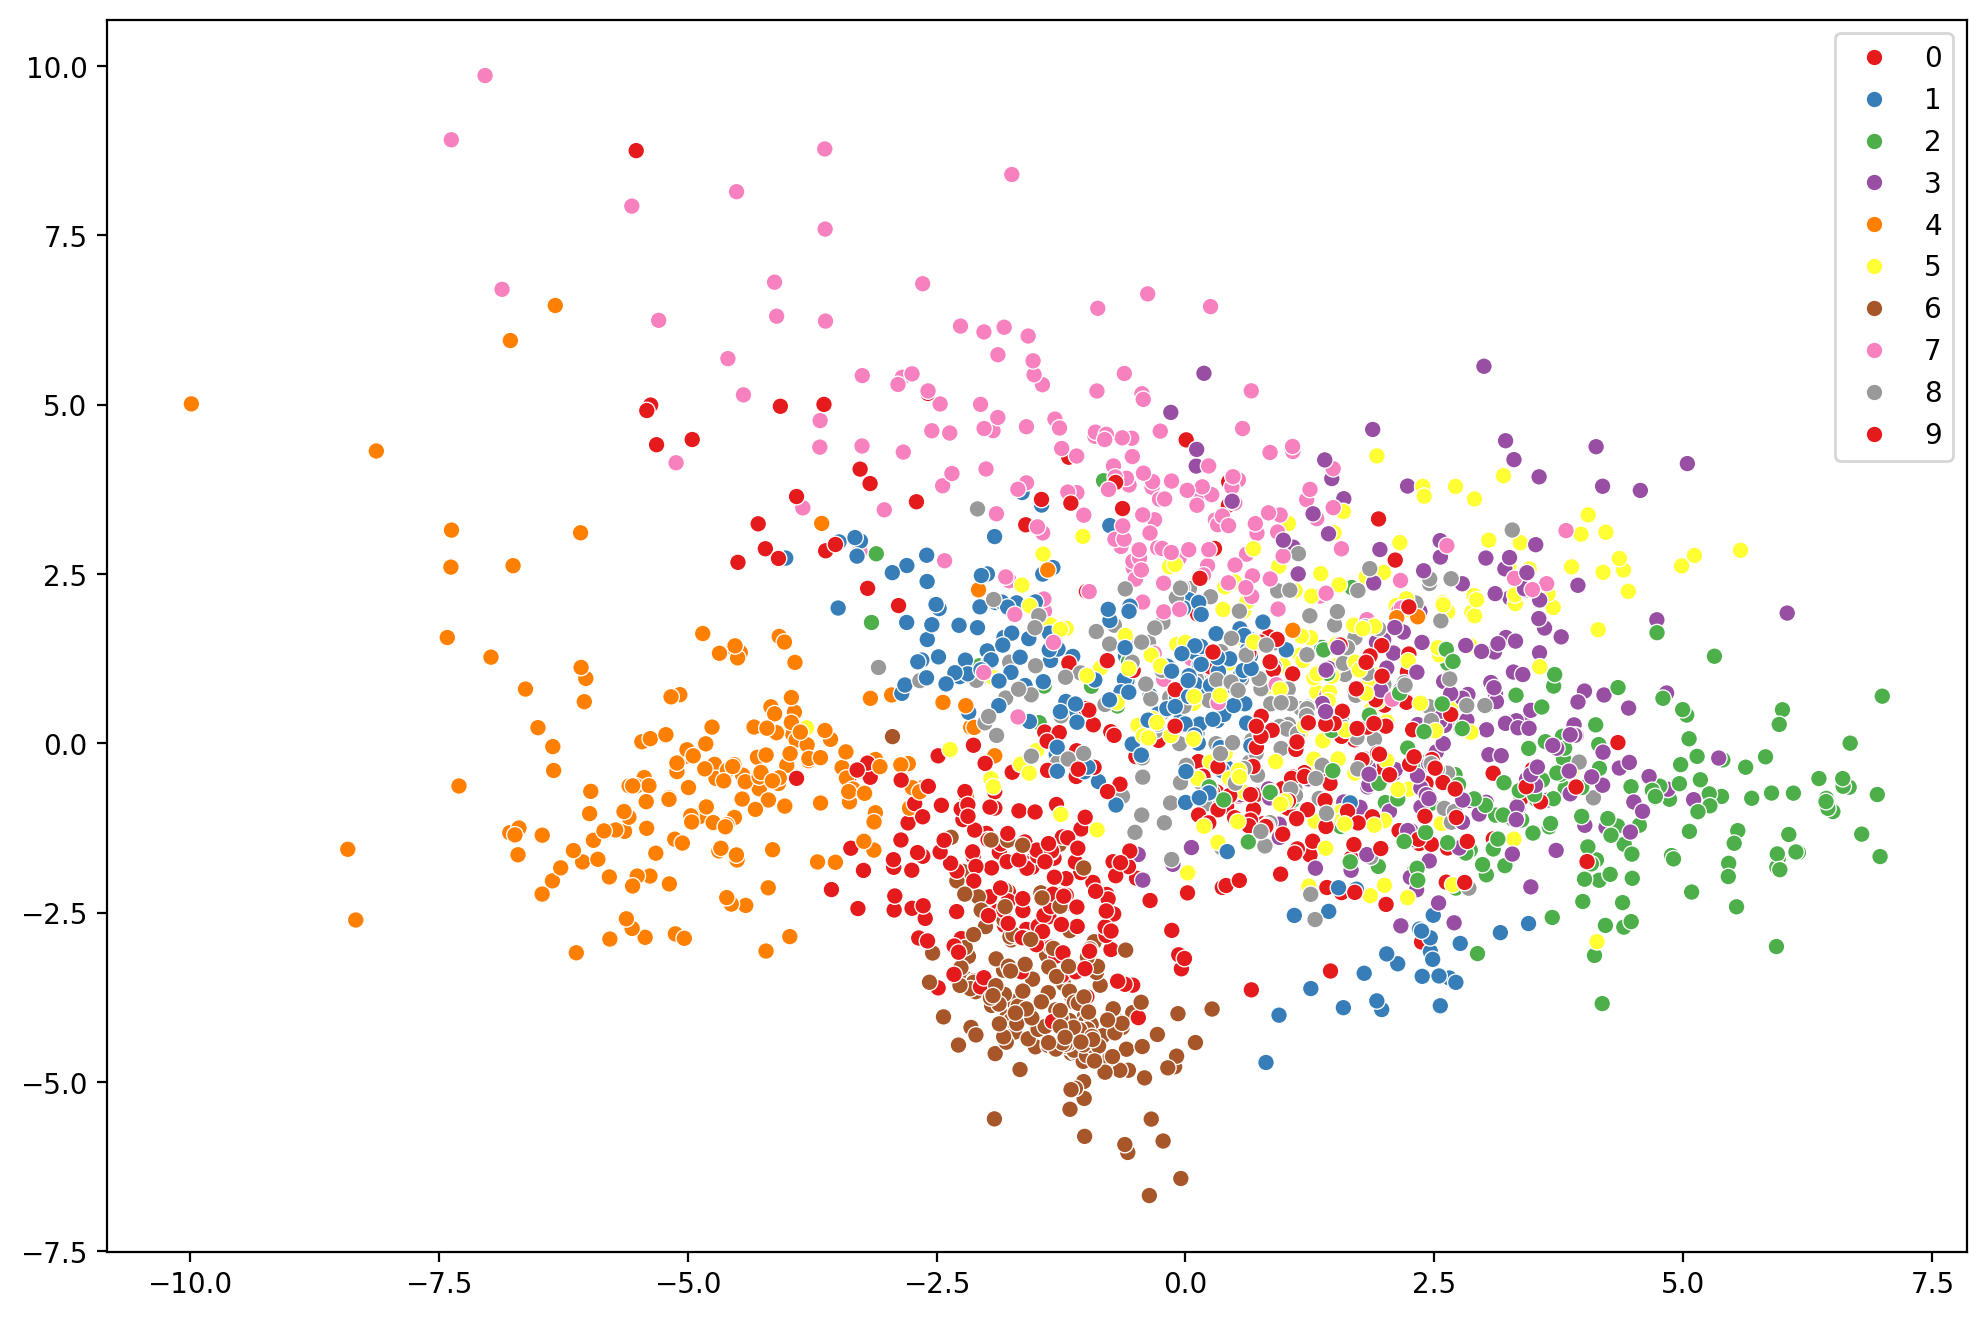

In [60]:
plt.figure(figsize=(12, 8), dpi=200)
labels = digits['number_label'].values
sns.scatterplot(x=pc_result[:, 0], y=pc_result[:, 1], hue=labels, palette='Set1')
plt.show()

В старых версиях Scikit-Learn, которые использовались во время прохождения курса, график выглядит одним образом. А если сделать то же самое в новых версиях Scikit-Learn, то по горизонтали значения зеркально противоположные - плюс и минус поменялись местами. Так что причина в смене версий Scikit-Learn.

С точки зрения метода главных компонент, если поменять направление какой-либо из осей на противоположное, то это будет абсолютно та же самая главная компонента - ведь набор исходных компонент, из которых состоит эта главная компонента, абсолютно такой же. Просто ось смотрит в противоположную сторону. Поэтому формально вполне можно сказать, что результат получился таким же, как и раньше.

Видимо при смене версий в какой-то момент что-то поменялось внутри класса PCA, и в новой версии он срабатывает немного по-другому.

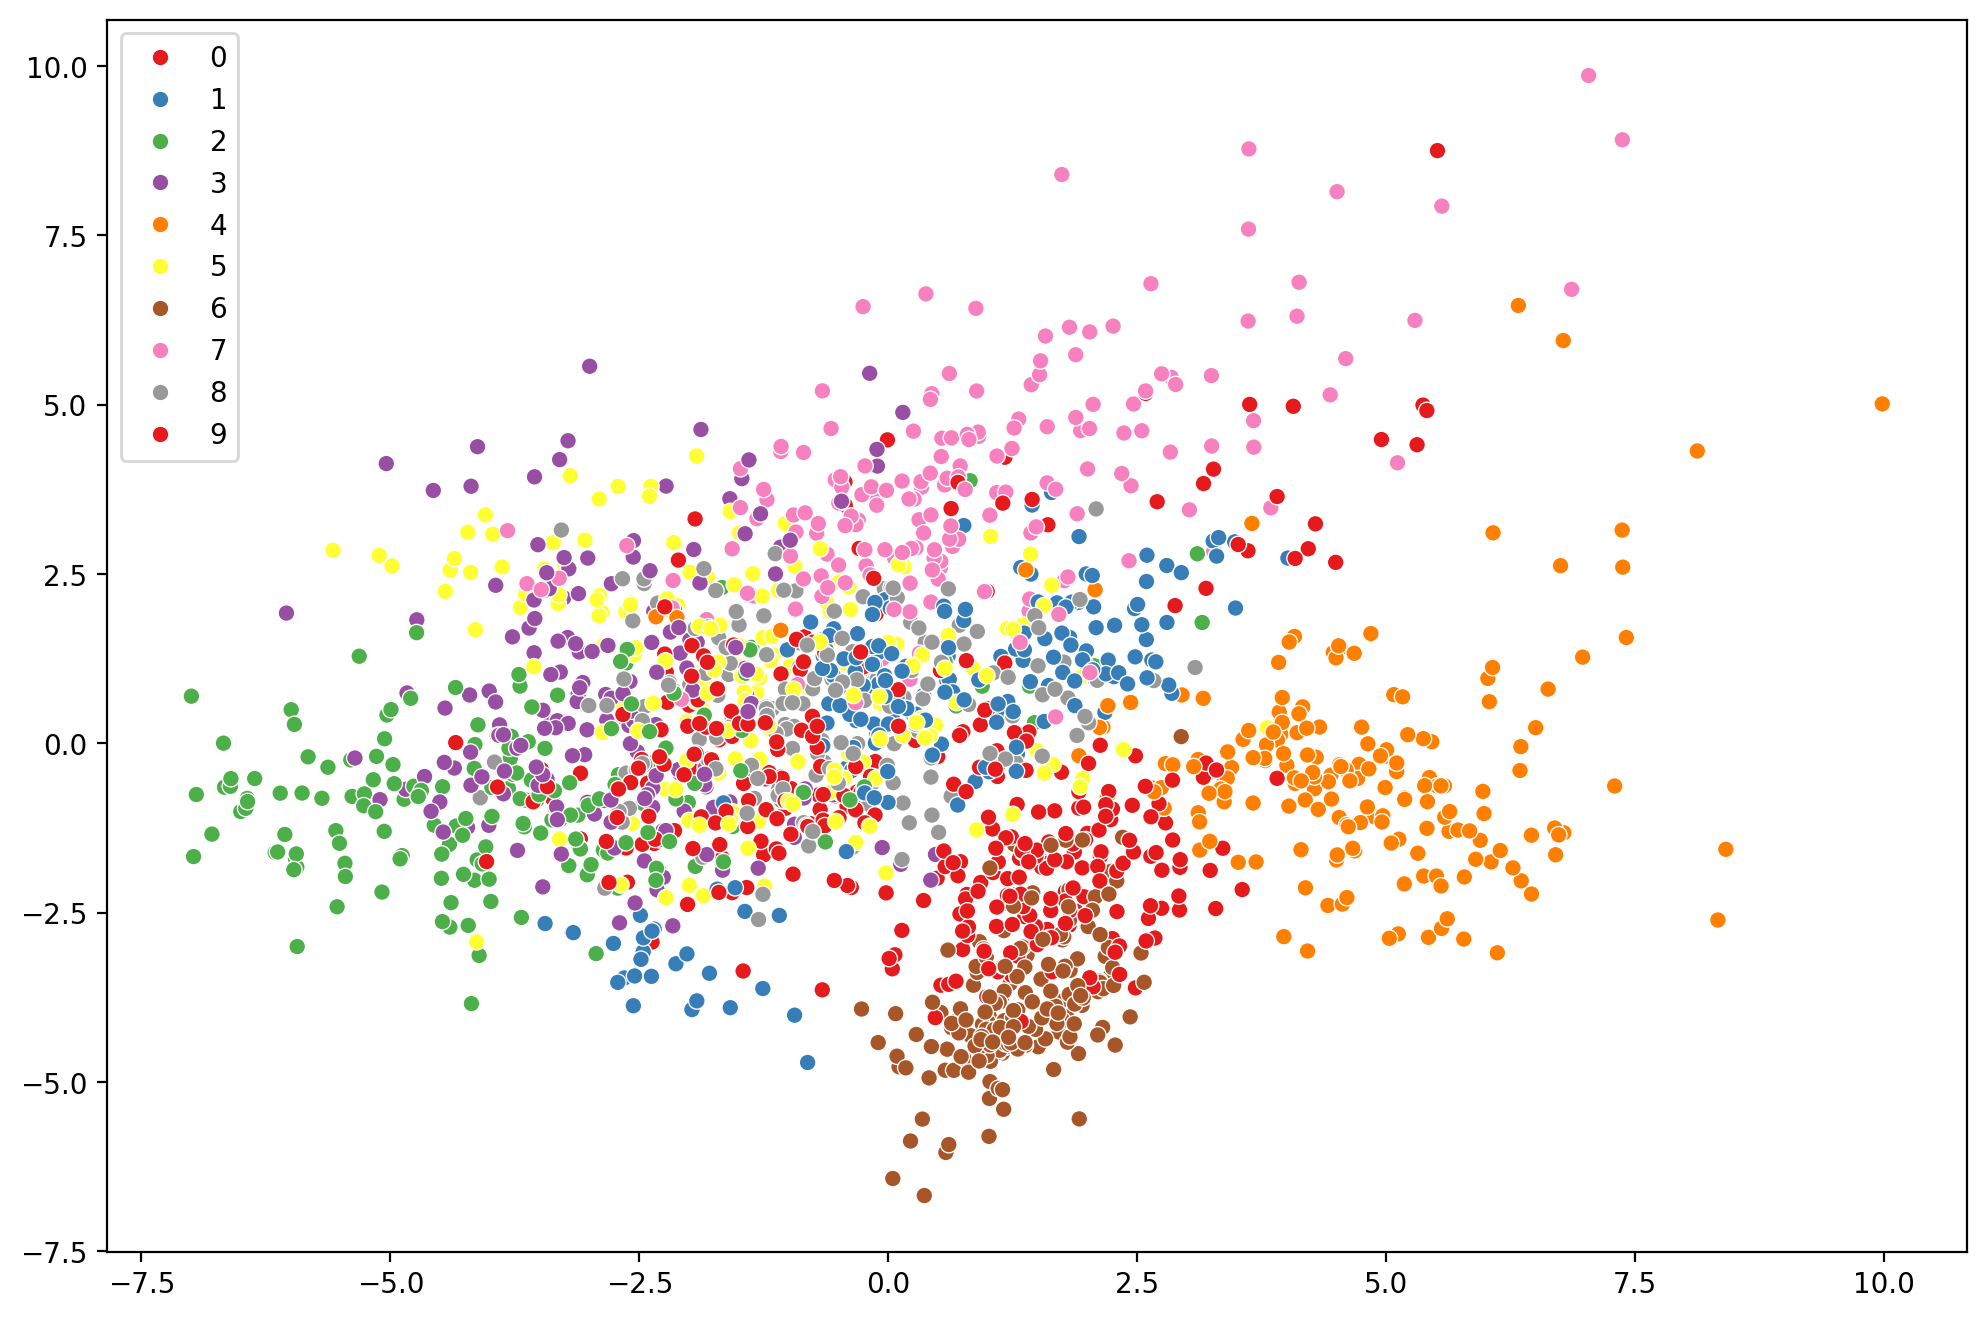

In [62]:
plt.figure(figsize=(12, 8), dpi=200)
labels = digits['number_label'].values
sns.scatterplot(x=pc_result[:, 0]*-1, y=pc_result[:, 1], hue=labels, palette='Set1')
plt.show()

**Какие цифры наиболее чётко отделимы друг от друга?**

Наиболее чётко отделимы друг от друга цифры 4, 6 и 2

-----------
---------

**Построим 3D-график для результатов работы метода главных компонент для 3 главных компонент. Это можно сделать разными способами с помощью различных библиотек, например plotly или bokeh, но на самом деле это можно сделать с помощью только Matplotlib и Jupyter Notebook.**

In [64]:
pca_3 = PCA(n_components=3)

In [66]:
pca_3_res = pca_3.fit_transform(scaled_X)

In [68]:
xs = pca_3_res[:, 0]

In [70]:
ys = pca_3_res[:, 1]

In [72]:
zs = pca_3_res[:, 2]

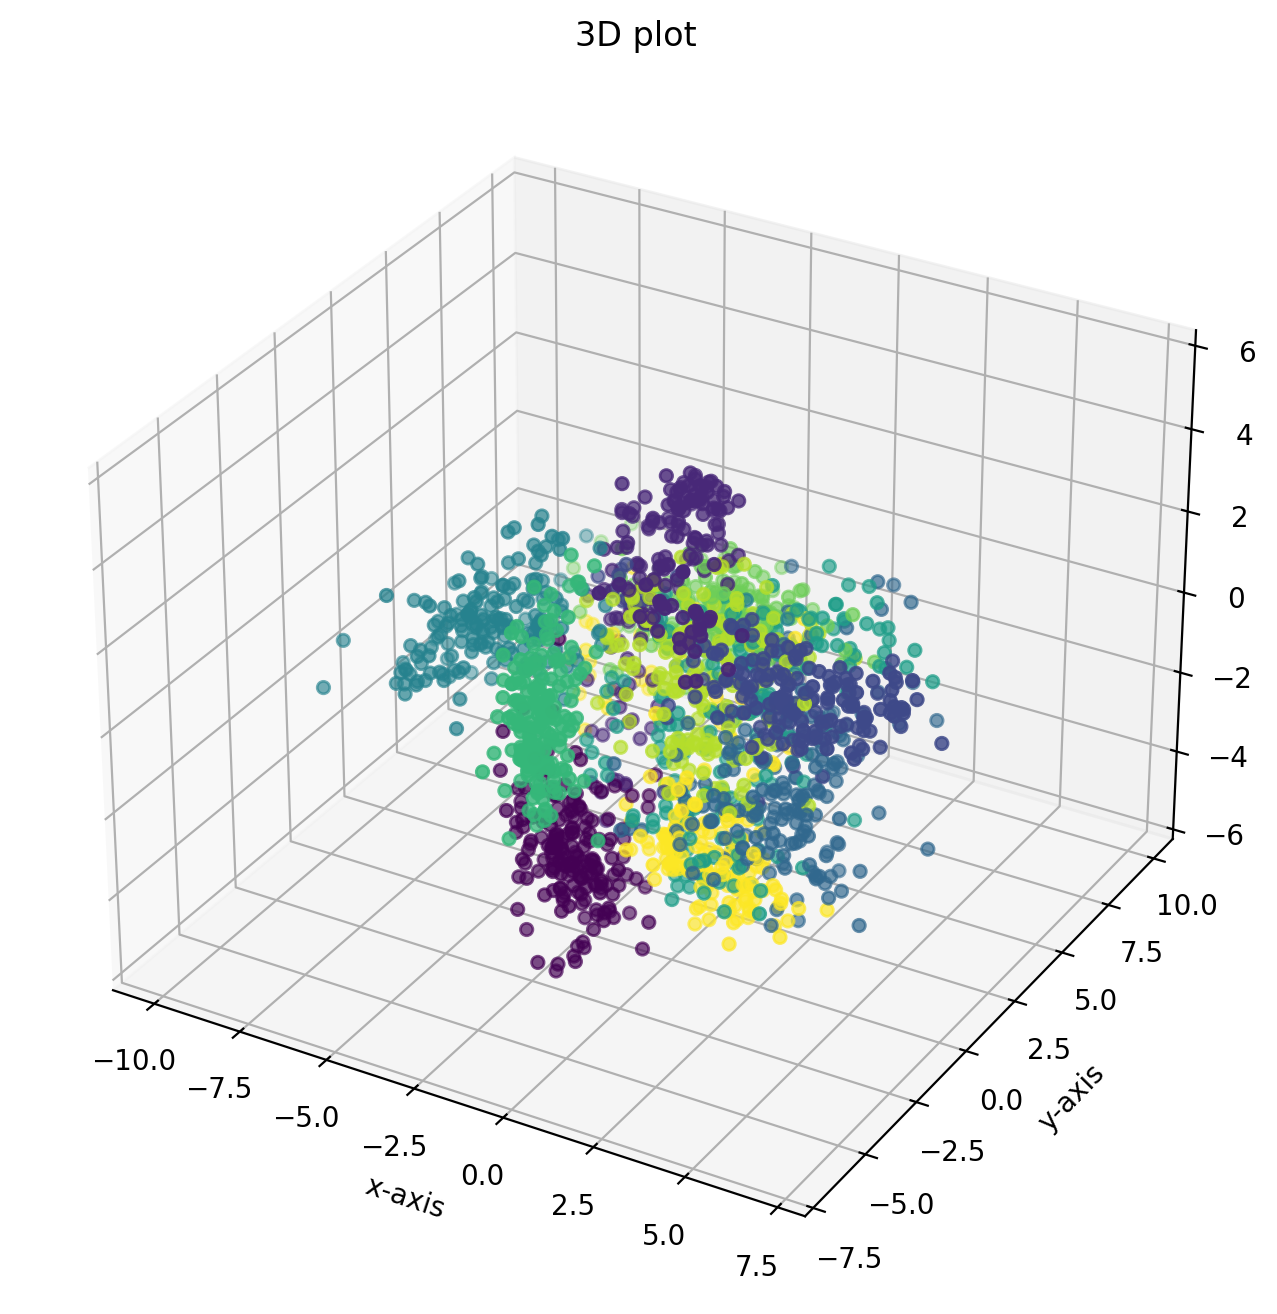

In [74]:
fig = plt.figure(figsize=(12, 8), dpi=200)
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, c=digits['number_label'])
ax.set_title("3D plot") 
ax.set_xlabel('x-axis') 
ax.set_ylabel('y-axis') 
ax.set_zlabel('z-axis') 
plt.show()

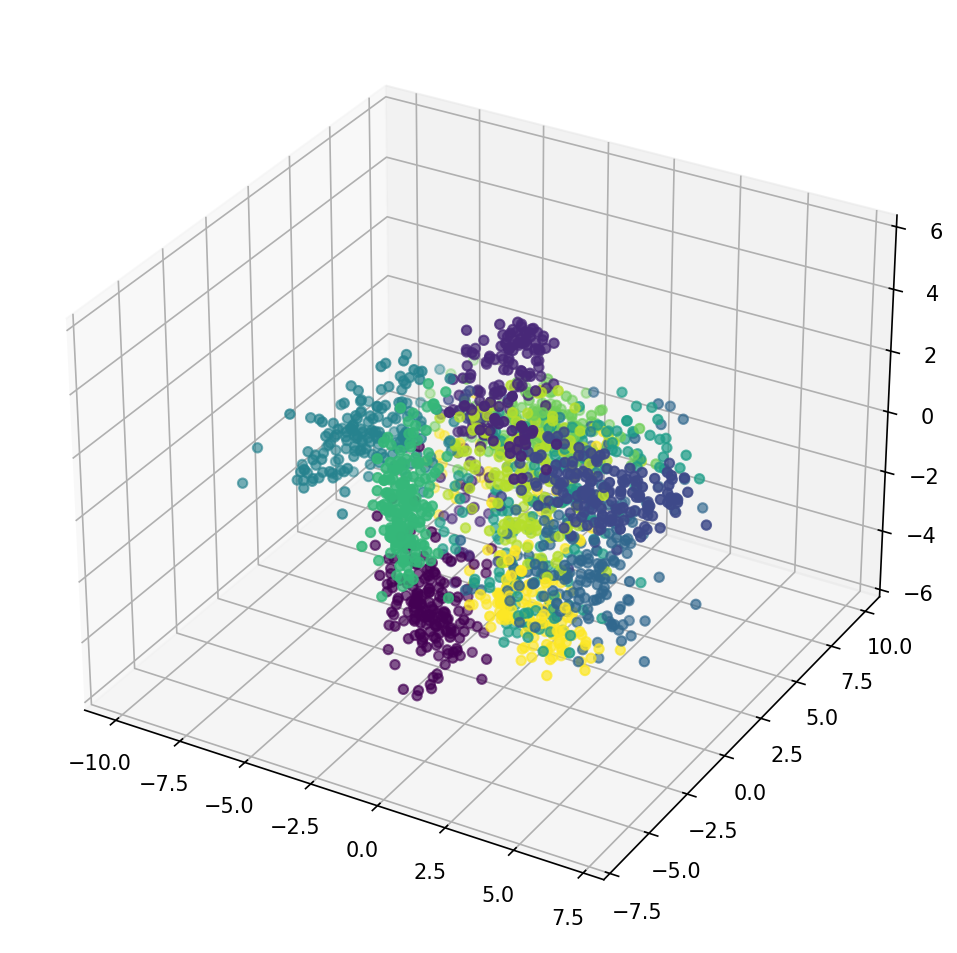

In [76]:
plt.figure(figsize=(8,8), dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_3_res[:,0], pca_3_res[:,1], pca_3_res[:,2], c=digits['number_label'])
plt.show()